In [1]:
import json
import codecs
import requests
import numpy as np
import pandas as pd 
from PIL import Image
from tqdm import tqdm
from io import BytesIO

In [2]:
jsonData = []
JSONPATH = "Indian_Number_plates.json"
with codecs.open(JSONPATH, 'rU', 'utf-8') as js:
    for line in js:
        jsonData.append(json.loads(line))

print(f"{len(jsonData)} image found!")

print("Sample row:")
jsonData[0]

237 image found!
Sample row:


{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg',
 'annotation': [{'label': ['number_plate'],
   'notes': '',
   'points': [{'x': 0.7220843672456576, 'y': 0.5879828326180258},
    {'x': 0.8684863523573201, 'y': 0.6888412017167382}],
   'imageWidth': 806,
   'imageHeight': 466}],
 'extras': None}

In [3]:
jsonData[1]

{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg',
 'annotation': [{'label': ['number_plate'],
   'notes': '',
   'points': [{'x': 0.16194331983805668, 'y': 0.8507795100222717},
    {'x': 0.582995951417004, 'y': 1}],
   'imageWidth': 494,
   'imageHeight': 449}],
 'extras': None}

In [4]:
import requests
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import urllib
import cv2
import os

In [5]:
import json

# Read the data
data = pd.read_json('Indian_Number_plates.json', lines=True)
pd.set_option('display.max_colwidth', -1)

# Delete the empty column
del data['extras']

In [6]:
jsonData[0]

{'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg',
 'annotation': [{'label': ['number_plate'],
   'notes': '',
   'points': [{'x': 0.7220843672456576, 'y': 0.5879828326180258},
    {'x': 0.8684863523573201, 'y': 0.6888412017167382}],
   'imageWidth': 806,
   'imageHeight': 466}],
 'extras': None}

In [7]:
data

,annotation,content
0,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.722084367245657, 'y': 0.5879828326180251}, {'x': 0.8684863523573201, 'y': 0.688841201716738}], 'imageWidth': 806, 'imageHeight': 466}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg
1,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.16194331983805602, 'y': 0.850779510022271}, {'x': 0.582995951417004, 'y': 1}], 'imageWidth': 494, 'imageHeight': 449}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg
2,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.082, 'y': 0.697452229299363}, {'x': 0.23, 'y': 0.8280254777070061}], 'imageWidth': 500, 'imageHeight': 314}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg
3,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.434, 'y': 0.667377398720682}, {'x': 0.718, 'y': 0.7654584221748401}], 'imageWidth': 500, 'imageHeight': 469}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg
4,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.20879120879120802, 'y': 0.39076376554174}, {'x': 0.865134865134865, 'y': 0.9840142095914741}], 'imageWidth': 1001, 'imageHeight': 563}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg
5,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.254807692307692, 'y': 0.649651972157772}, {'x': 0.627403846153846, 'y': 0.7772621809744781}], 'imageWidth': 416, 'imageHeight': 431}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/18d2b870-7817-46da-a59a-6406c1b472c9___1033.png
6,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.411978221415607, 'y': 0.529670329670329}, {'x': 0.8058076225045371, 'y': 0.6923076923076921}], 'imageWidth': 551, 'imageHeight': 455}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/8b9e7112-9149-48fb-b8e8-c3e89cce5af0___1074650_10201043987997310_227646612_o.jpg.jpeg
7,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.48545454545454503, 'y': 0.461824953445065}, {'x': 0.72, 'y': 0.595903165735568}], 'imageWidth': 550, 'imageHeight': 537}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/be483d11-33f0-4c1f-87b6-9844eea28996___1093346d1370435964-take-look-number-plate-photo.jpg.jpeg
8,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.410757946210268, 'y': 0.453714285714285}, {'x': 0.5688671556642211, 'y': 0.516571428571428}], 'imageWidth': 1569, 'imageHeight': 1119}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/ab573806-1da7-4ccf-93c8-6082e0cc15c3___1107433d1373284570-my-modded-skoda-rapid-now-166-bhp-351-nm-119-whp-per-tonne-hdr_00005_normal.jpg.jpeg
9,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.41320293398533003, 'y': 0.397101449275362}, {'x': 0.58679706601467, 'y': 0.623188405797101}], 'imageWidth': 1632, 'imageHeight': 918}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/dfedf2ad-6596-48d4-a7f6-171e55c8f637___1160575d1383218860-high-security-registration-plates-hsrp-india-wp_20131030_16_01_22_pro.jpg.jpeg


In [8]:
data['points'] = data.apply(lambda row: row['annotation'][0]['points'], axis=1)

In [9]:
data

,annotation,content,points
0,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.722084367245657, 'y': 0.5879828326180251}, {'x': 0.8684863523573201, 'y': 0.688841201716738}], 'imageWidth': 806, 'imageHeight': 466}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg,"[{'x': 0.722084367245657, 'y': 0.5879828326180251}, {'x': 0.8684863523573201, 'y': 0.688841201716738}]"
1,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.16194331983805602, 'y': 0.850779510022271}, {'x': 0.582995951417004, 'y': 1}], 'imageWidth': 494, 'imageHeight': 449}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg,"[{'x': 0.16194331983805602, 'y': 0.850779510022271}, {'x': 0.582995951417004, 'y': 1}]"
2,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.082, 'y': 0.697452229299363}, {'x': 0.23, 'y': 0.8280254777070061}], 'imageWidth': 500, 'imageHeight': 314}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg,"[{'x': 0.082, 'y': 0.697452229299363}, {'x': 0.23, 'y': 0.8280254777070061}]"
3,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.434, 'y': 0.667377398720682}, {'x': 0.718, 'y': 0.7654584221748401}], 'imageWidth': 500, 'imageHeight': 469}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg,"[{'x': 0.434, 'y': 0.667377398720682}, {'x': 0.718, 'y': 0.7654584221748401}]"
4,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.20879120879120802, 'y': 0.39076376554174}, {'x': 0.865134865134865, 'y': 0.9840142095914741}], 'imageWidth': 1001, 'imageHeight': 563}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg,"[{'x': 0.20879120879120802, 'y': 0.39076376554174}, {'x': 0.865134865134865, 'y': 0.9840142095914741}]"
5,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.254807692307692, 'y': 0.649651972157772}, {'x': 0.627403846153846, 'y': 0.7772621809744781}], 'imageWidth': 416, 'imageHeight': 431}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/18d2b870-7817-46da-a59a-6406c1b472c9___1033.png,"[{'x': 0.254807692307692, 'y': 0.649651972157772}, {'x': 0.627403846153846, 'y': 0.7772621809744781}]"
6,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.411978221415607, 'y': 0.529670329670329}, {'x': 0.8058076225045371, 'y': 0.6923076923076921}], 'imageWidth': 551, 'imageHeight': 455}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/8b9e7112-9149-48fb-b8e8-c3e89cce5af0___1074650_10201043987997310_227646612_o.jpg.jpeg,"[{'x': 0.411978221415607, 'y': 0.529670329670329}, {'x': 0.8058076225045371, 'y': 0.6923076923076921}]"
7,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.48545454545454503, 'y': 0.461824953445065}, {'x': 0.72, 'y': 0.595903165735568}], 'imageWidth': 550, 'imageHeight': 537}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/be483d11-33f0-4c1f-87b6-9844eea28996___1093346d1370435964-take-look-number-plate-photo.jpg.jpeg,"[{'x': 0.48545454545454503, 'y': 0.461824953445065}, {'x': 0.72, 'y': 0.595903165735568}]"
8,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.410757946210268, 'y': 0.453714285714285}, {'x': 0.5688671556642211, 'y': 0.516571428571428}], 'imageWidth': 1569, 'imageHeight': 1119}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/ab573806-1da7-4ccf-93c8-6082e0cc15c3___1107433d1373284570-my-modded-skoda-rapid-now-166-bhp-351-nm-119

In [10]:
del data['annotation']

In [11]:
data

,content,points
0,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg,"[{'x': 0.722084367245657, 'y': 0.5879828326180251}, {'x': 0.8684863523573201, 'y': 0.688841201716738}]"
1,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg,"[{'x': 0.16194331983805602, 'y': 0.850779510022271}, {'x': 0.582995951417004, 'y': 1}]"
2,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg,"[{'x': 0.082, 'y': 0.697452229299363}, {'x': 0.23, 'y': 0.8280254777070061}]"
3,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg,"[{'x': 0.434, 'y': 0.667377398720682}, {'x': 0.718, 'y': 0.7654584221748401}]"
4,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg,"[{'x': 0.20879120879120802, 'y': 0.39076376554174}, {'x': 0.865134865134865, 'y': 0.9840142095914741}]"
5,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/18d2b870-7817-46da-a59a-6406c1b472c9___1033.png,"[{'x': 0.254807692307692, 'y': 0.649651972157772}, {'x': 0.627403846153846, 'y': 0.7772621809744781}]"
6,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/8b9e7112-9149-48fb-b8e8-c3e89cce5af0___1074650_10201043987997310_227646612_o.jpg.jpeg,"[{'x': 0.411978221415607, 'y': 0.529670329670329}, {'x': 0.8058076225045371, 'y': 0.6923076923076921}]"
7,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/be483d11-33f0-4c1f-87b6-9844eea28996___1093346d1370435964-take-look-number-plate-photo.jpg.jpeg,"[{'x': 0.48545454545454503, 'y': 0.461824953445065}, {'x': 0.72, 'y': 0.595903165735568}]"
8,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/ab573806-1da7-4ccf-93c8-6082e0cc15c3___1107433d1373284570-my-modded-skoda-rapid-now-166-bhp-351-nm-119-whp-per-tonne-hdr_00005_normal.jpg.jpeg,"[{'x': 0.410757946210268, 'y': 0.453714285714285}, {'x': 0.5688671556642211, 'y': 0.516571428571428}]"
9,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/dfedf2ad-6596-48d4-a7f6-171e55c8f637___1160575d1383218860-high-security-registration-plates-hsrp-india-wp_20131030_16_01_22_pro.jpg.jpeg,"[{'x': 0.41320293398533003, 'y': 0.397101449275362}, {'x': 0.58679706601467, 'y': 0.623188405797101}]"


In [12]:
for index, row in data.iterrows():

        # Get the image from the URL
        print(row[0])
        #resp = urllib.request.urlopen(row[0])
        #im = np.array(Image.open(resp))

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/18d2b870-7817-46da-a59a-6406c1b472c9___1033.png
http://com.dataturks.a96-i23.open.s3.amazon

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/55aa4ee8-13fd-45bd-b83b-651ac665d71a___200560387_4_1000x700_2012-toyota-innova-diesel-130000-kms-cars.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/31847e78-6696-4dc2-be08-cb37d512c576___2010_Maruti_WagonR_Review.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/631031c0-98c5-4a8f-959e-ddf3c81cd6ae___20131127_145021.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/dd58e02d-51a5-4bfd-87af-ff51c576086e___2014-mahindra-scorpio-suv-10.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/a1928183-9ebe-40f0-9a84-500aecc61474___2014-Skoda-Superb-facelift-spied-in-India.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Drive.jpg.jpeg
http:

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/1f0a7fe8-ac9b-4b54-9d55-e11f34f9f98b___9f6521b2ddb7b8e40ffd510966ffcca3.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/11ad2f1a-4cbd-4176-a4f5-3be001ec95a3___a4auto.com5140_.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/50dfc8ce-e3e0-4856-aeba-2dcdf0fc2bec___Alto-Eco-India-rear-2.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/c8a79e91-8c48-42d0-9b80-137fd033493c___automakers-number-plates-nitin-gadkari_827x510_61522653557.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/59e121dc-ebc6-4e4c-ba88-7fe04b569218___Autopsyches-Skoda-Laura-6.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/d0be15f3-4b3e-42f6-88d5-2a7fe4360dbe___Baleno-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/fd0140cc-e887-43b8-a439-24877ea77670___Maruti-Suzuki-Baleno-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/13ffaad4-a186-46bd-ae5d-924d1c8d7c50___maruti-suzuki-Baleno-RS-pics-48.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/fb939bb1-5257-4879-bafb-539472ffb73d___Maruti-Suzuki-Brezza-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/ec4bde57-11dd-4d59-96ae-b5d3b28afda5___Maruti-Suzuki-Celerio-Back-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/b78259be-7ef5-4499-b9a2-2b8a37660e8b___Maruti-Suzuki-Celerio-Front-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/49bdf0d9-4e64-41eb-9c19-eabdc4afb051___Maru

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/254b647f-4cb3-46c3-a206-4e70041f4c78___speedex-number-plates-nandanam-chennai-car-number-plate-dealers-33nu2i6.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/69b56ab9-accd-4c67-aa7a-a884c018e5ab___speedex-number-plates-nandanam-chennai-car-number-plate-dealers-3zh7n2s.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/684f079f-6085-420c-8e4e-e1aed270fc05___Toyota-Fortuner-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/ad65d729-1bf7-408c-b991-f3e329f17aab___two-wheeler-number-plate-250x250.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/21cc678a-b9c5-4bbb-ace0-9e096e799632___unnamed-300x225.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/aff1f53b-3259-44f0-9718-05

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/07e787a7-6cc3-482c-9ce5-f0ce115b47f1___new_VW-Polo-GT-TSI-badges-on-the-boot-lid.jpg.jpeg


In [13]:
for index, row in data.iterrows():

        # Get the image from the URL
        print(row[1])

[{'x': 0.722084367245657, 'y': 0.5879828326180251}, {'x': 0.8684863523573201, 'y': 0.688841201716738}]
[{'x': 0.16194331983805602, 'y': 0.850779510022271}, {'x': 0.582995951417004, 'y': 1}]
[{'x': 0.082, 'y': 0.697452229299363}, {'x': 0.23, 'y': 0.8280254777070061}]
[{'x': 0.434, 'y': 0.667377398720682}, {'x': 0.718, 'y': 0.7654584221748401}]
[{'x': 0.20879120879120802, 'y': 0.39076376554174}, {'x': 0.865134865134865, 'y': 0.9840142095914741}]
[{'x': 0.254807692307692, 'y': 0.649651972157772}, {'x': 0.627403846153846, 'y': 0.7772621809744781}]
[{'x': 0.411978221415607, 'y': 0.529670329670329}, {'x': 0.8058076225045371, 'y': 0.6923076923076921}]
[{'x': 0.48545454545454503, 'y': 0.461824953445065}, {'x': 0.72, 'y': 0.595903165735568}]
[{'x': 0.410757946210268, 'y': 0.453714285714285}, {'x': 0.5688671556642211, 'y': 0.516571428571428}]
[{'x': 0.41320293398533003, 'y': 0.397101449275362}, {'x': 0.58679706601467, 'y': 0.623188405797101}]
[{'x': 0.311526479750778, 'y': 0.34500000000000003}, 

[{'x': 0.453514739229024, 'y': 0.5096418732782371}, {'x': 0.816326530612244, 'y': 0.724517906336088}]
[{'x': 0.4360228198859, 'y': 0.5427872860635691}, {'x': 0.599837000814995, 'y': 0.618581907090464}]
[{'x': 0.5615321923390381, 'y': 0.47555012224938803}, {'x': 0.792176039119804, 'y': 0.6210268948655251}]
[{'x': 0.37000814995925, 'y': 0.469565217391304}, {'x': 0.69682151589242, 'y': 0.572826086956521}]
[{'x': 0.6796536796536791, 'y': 0.358620689655172}, {'x': 0.8311688311688311, 'y': 0.510344827586206}]
[{'x': 0.606, 'y': 0.512455516014234}, {'x': 0.782, 'y': 0.629893238434163}]
[{'x': 0.34240362811791303, 'y': 0.784922394678492}, {'x': 0.6870748299319721, 'y': 0.9445676274944561}]
[{'x': 0.15384615384615302, 'y': 0.6147540983606551}, {'x': 0.45358090185676303, 'y': 0.844262295081967}]
[{'x': 0.397297297297297, 'y': 0.43265306122448904}, {'x': 0.612162162162162, 'y': 0.538775510204081}]
[{'x': 0.314911366006256, 'y': 0.437956204379562}, {'x': 0.699687174139728, 'y': 0.556830031282586}]

[{'x': 0.032, 'y': 0.05161290322580601}, {'x': 0.99, 'y': 0.864516129032258}]
[{'x': 0.442, 'y': 0.455223880597014}, {'x': 0.862, 'y': 0.686567164179104}]
[{'x': 0.418, 'y': 0.35470085470085405}, {'x': 0.896, 'y': 0.6837606837606831}]
[{'x': 0.264413518886679, 'y': 0.44040404040404}, {'x': 0.9701789264413511, 'y': 0.8565656565656561}]
[{'x': 0.325, 'y': 0.603333333333333}, {'x': 0.6575000000000001, 'y': 0.75}]
[{'x': 0.09, 'y': 0.41000000000000003}, {'x': 0.275, 'y': 0.55}]
[{'x': 0.33103448275862, 'y': 0.644607843137254}, {'x': 0.44, 'y': 0.7892156862745091}]
[{'x': 0.3798828125, 'y': 0.656934306569343}, {'x': 0.5859375, 'y': 0.7430656934306571}]
[{'x': 0.31465517241379304, 'y': 0.337628865979381}, {'x': 0.701149425287356, 'y': 0.5025773195876281}]
[{'x': 0.35625, 'y': 0.47279549718574104}, {'x': 0.6212500000000001, 'y': 0.600375234521576}]
[{'x': 0.31228668941979504, 'y': 0.61631419939577}, {'x': 0.43515358361774703, 'y': 0.703927492447129}]
[{'x': 0.338, 'y': 0.7558139534883721}, {'

0 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg
1 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg
2 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg
3 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg
4 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg
5 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/18d2b870-7817-46da-a59a-6406c1b472c9___1033.png
6 http://com.dataturks.a96-i23.

41 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/55aa4ee8-13fd-45bd-b83b-651ac665d71a___200560387_4_1000x700_2012-toyota-innova-diesel-130000-kms-cars.jpg.jpeg
42 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/31847e78-6696-4dc2-be08-cb37d512c576___2010_Maruti_WagonR_Review.jpg.jpeg
43 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/631031c0-98c5-4a8f-959e-ddf3c81cd6ae___20131127_145021.jpg.jpeg
44 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/dd58e02d-51a5-4bfd-87af-ff51c576086e___2014-mahindra-scorpio-suv-10.jpg.jpeg
45 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/a1928183-9ebe-40f0-9a84-500aecc61474___2014-Skoda-Superb-facelift-spied-in-India.jpg.jpeg
46 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Dr

89 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/e69f33fd-730a-46f3-9d99-edde32847161___995920d1349421647-cappuccino-beige-czech-tank-here-my-skoda-laura-2-0-elegance-mt-20121005_121433.jpg.jpeg
90 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/1f0a7fe8-ac9b-4b54-9d55-e11f34f9f98b___9f6521b2ddb7b8e40ffd510966ffcca3.jpg.jpeg
91 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/11ad2f1a-4cbd-4176-a4f5-3be001ec95a3___a4auto.com5140_.jpg.jpeg
92 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/50dfc8ce-e3e0-4856-aeba-2dcdf0fc2bec___Alto-Eco-India-rear-2.jpg.jpeg
93 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/c8a79e91-8c48-42d0-9b80-137fd033493c___automakers-number-plates-nitin-gadkari_827x510_61522653557.jpg.jpeg
94 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/59e121dc-e

138 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/41de2ad0-3785-488e-9f1f-75b76f446cc7___Maruti-Alto-K10-Photos-2.jpg.jpeg
139 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/e204c50d-b861-4f68-827f-575351d150b4___Maruti-Baleno-RS-4.jpg.jpeg
140 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/d9023f53-f90d-4b98-bd52-30796777ddcf___Maruti-Suzuki-Baleno-hatchback-56545.jpg.jpeg
141 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/fd0140cc-e887-43b8-a439-24877ea77670___Maruti-Suzuki-Baleno-Number-Plates-Design.jpg.jpeg
142 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/13ffaad4-a186-46bd-ae5d-924d1c8d7c50___maruti-suzuki-Baleno-RS-pics-48.jpg.jpeg
143 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/fb939bb1-5257-4879-bafb-539472ffb73d___Maruti-Suzuki-Brezza-Number-Plates-Des

187 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/af608b5e-07d6-4bcf-84d0-f0cba9e54e12___Skoda-Superb-Rear-Profile.jpg.jpeg
188 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/d16041c1-831d-4cc9-8869-68be8b6e12d7___slider-new-2.jpg.jpeg
189 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/f16274c4-0d3d-4c85-9dcc-5ac71734b281___speedex-number-plates-nandanam-chennai-car-number-plate-dealers-1ofla74.jpg.jpeg
190 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/254b647f-4cb3-46c3-a206-4e70041f4c78___speedex-number-plates-nandanam-chennai-car-number-plate-dealers-33nu2i6.jpg.jpeg
191 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/69b56ab9-accd-4c67-aa7a-a884c018e5ab___speedex-number-plates-nandanam-chennai-car-number-plate-dealers-3zh7n2s.jpg.jpeg
192 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064

232 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/fc1f58f0-2f54-4545-8915-2936d08dcce1___new_Skoda_Laura_DSG_Long_Term_Review-125.jpg.jpeg
233 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/7073bd18-c0bf-47da-9e43-8c9d27831f11___new_Skoda-Laura-rear.jpg.jpeg
234 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5c85a40f-ce81-44b4-82b2-dfdac281217d___new_Skoda-Octavia-1.8-TSI-5.jpg.jpeg
235 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/89d26be7-258a-4470-b0fe-d1df57b20d55___new_Skoda-Octavia-5.jpg.jpeg
236 http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/07e787a7-6cc3-482c-9ce5-f0ce115b47f1___new_VW-Polo-GT-TSI-badges-on-the-boot-lid.jpg.jpeg


In [18]:
for row in data.itertuples():
    print(row[1])

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/18d2b870-7817-46da-a59a-6406c1b472c9___1033.png
http://com.dataturks.a96-i23.open.s3.amazon

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/55aa4ee8-13fd-45bd-b83b-651ac665d71a___200560387_4_1000x700_2012-toyota-innova-diesel-130000-kms-cars.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/31847e78-6696-4dc2-be08-cb37d512c576___2010_Maruti_WagonR_Review.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/631031c0-98c5-4a8f-959e-ddf3c81cd6ae___20131127_145021.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/dd58e02d-51a5-4bfd-87af-ff51c576086e___2014-mahindra-scorpio-suv-10.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/a1928183-9ebe-40f0-9a84-500aecc61474___2014-Skoda-Superb-facelift-spied-in-India.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Drive.jpg.jpeg
http:

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/1f0a7fe8-ac9b-4b54-9d55-e11f34f9f98b___9f6521b2ddb7b8e40ffd510966ffcca3.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/11ad2f1a-4cbd-4176-a4f5-3be001ec95a3___a4auto.com5140_.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/50dfc8ce-e3e0-4856-aeba-2dcdf0fc2bec___Alto-Eco-India-rear-2.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/c8a79e91-8c48-42d0-9b80-137fd033493c___automakers-number-plates-nitin-gadkari_827x510_61522653557.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/59e121dc-ebc6-4e4c-ba88-7fe04b569218___Autopsyches-Skoda-Laura-6.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/d0be15f3-4b3e-42f6-88d5-2a7fe4360dbe___Baleno-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/fd0140cc-e887-43b8-a439-24877ea77670___Maruti-Suzuki-Baleno-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/13ffaad4-a186-46bd-ae5d-924d1c8d7c50___maruti-suzuki-Baleno-RS-pics-48.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/fb939bb1-5257-4879-bafb-539472ffb73d___Maruti-Suzuki-Brezza-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/ec4bde57-11dd-4d59-96ae-b5d3b28afda5___Maruti-Suzuki-Celerio-Back-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/b78259be-7ef5-4499-b9a2-2b8a37660e8b___Maruti-Suzuki-Celerio-Front-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/49bdf0d9-4e64-41eb-9c19-eabdc4afb051___Maru

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/254b647f-4cb3-46c3-a206-4e70041f4c78___speedex-number-plates-nandanam-chennai-car-number-plate-dealers-33nu2i6.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/69b56ab9-accd-4c67-aa7a-a884c018e5ab___speedex-number-plates-nandanam-chennai-car-number-plate-dealers-3zh7n2s.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/684f079f-6085-420c-8e4e-e1aed270fc05___Toyota-Fortuner-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/ad65d729-1bf7-408c-b991-f3e329f17aab___two-wheeler-number-plate-250x250.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/21cc678a-b9c5-4bbb-ace0-9e096e799632___unnamed-300x225.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/aff1f53b-3259-44f0-9718-05

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/07e787a7-6cc3-482c-9ce5-f0ce115b47f1___new_VW-Polo-GT-TSI-badges-on-the-boot-lid.jpg.jpeg


In [25]:
data['content'].iloc[0]

'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg'

In [26]:
for i in range(len(jsonData)):
    print(data['content'].iloc[i])
    

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/18d2b870-7817-46da-a59a-6406c1b472c9___1033.png
http://com.dataturks.a96-i23.open.s3.amazon

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/55aa4ee8-13fd-45bd-b83b-651ac665d71a___200560387_4_1000x700_2012-toyota-innova-diesel-130000-kms-cars.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/31847e78-6696-4dc2-be08-cb37d512c576___2010_Maruti_WagonR_Review.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/631031c0-98c5-4a8f-959e-ddf3c81cd6ae___20131127_145021.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/dd58e02d-51a5-4bfd-87af-ff51c576086e___2014-mahindra-scorpio-suv-10.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/a1928183-9ebe-40f0-9a84-500aecc61474___2014-Skoda-Superb-facelift-spied-in-India.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Drive.jpg.jpeg
http:

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/1f0a7fe8-ac9b-4b54-9d55-e11f34f9f98b___9f6521b2ddb7b8e40ffd510966ffcca3.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/11ad2f1a-4cbd-4176-a4f5-3be001ec95a3___a4auto.com5140_.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/50dfc8ce-e3e0-4856-aeba-2dcdf0fc2bec___Alto-Eco-India-rear-2.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/c8a79e91-8c48-42d0-9b80-137fd033493c___automakers-number-plates-nitin-gadkari_827x510_61522653557.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/59e121dc-ebc6-4e4c-ba88-7fe04b569218___Autopsyches-Skoda-Laura-6.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/d0be15f3-4b3e-42f6-88d5-2a7fe4360dbe___Baleno-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/fd0140cc-e887-43b8-a439-24877ea77670___Maruti-Suzuki-Baleno-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/13ffaad4-a186-46bd-ae5d-924d1c8d7c50___maruti-suzuki-Baleno-RS-pics-48.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/fb939bb1-5257-4879-bafb-539472ffb73d___Maruti-Suzuki-Brezza-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/ec4bde57-11dd-4d59-96ae-b5d3b28afda5___Maruti-Suzuki-Celerio-Back-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/b78259be-7ef5-4499-b9a2-2b8a37660e8b___Maruti-Suzuki-Celerio-Front-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/49bdf0d9-4e64-41eb-9c19-eabdc4afb051___Maru

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/254b647f-4cb3-46c3-a206-4e70041f4c78___speedex-number-plates-nandanam-chennai-car-number-plate-dealers-33nu2i6.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/69b56ab9-accd-4c67-aa7a-a884c018e5ab___speedex-number-plates-nandanam-chennai-car-number-plate-dealers-3zh7n2s.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/684f079f-6085-420c-8e4e-e1aed270fc05___Toyota-Fortuner-Number-Plates-Design.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/ad65d729-1bf7-408c-b991-f3e329f17aab___two-wheeler-number-plate-250x250.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/21cc678a-b9c5-4bbb-ace0-9e096e799632___unnamed-300x225.jpg.jpeg
http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/aff1f53b-3259-44f0-9718-05

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/07e787a7-6cc3-482c-9ce5-f0ce115b47f1___new_VW-Polo-GT-TSI-badges-on-the-boot-lid.jpg.jpeg


In [27]:
str=data['content'].iloc[0]

In [28]:
print(str)

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg


In [37]:
from urllib.request import urlretrieve
url = str
urlretrieve(url, "local-filename.jpg")


('local-filename.jpg', <http.client.HTTPMessage at 0x40f7c66c88>)

In [38]:
resp = urllib.request.urlopen(str)
im = np.array(Image.open(resp))

In [39]:
print(im)

[[[180 193 212]
  [180 193 212]
  [181 194 213]
  ...
  [177 190 209]
  [177 190 209]
  [177 190 209]]

 [[180 193 212]
  [180 193 212]
  [181 194 213]
  ...
  [177 190 209]
  [177 190 209]
  [177 190 209]]

 [[180 193 212]
  [180 193 212]
  [181 194 213]
  ...
  [177 190 209]
  [177 190 209]
  [177 190 209]]

 ...

 [[156 136  73]
  [164 144  81]
  [167 143  81]
  ...
  [134 140 114]
  [129 135 109]
  [126 132 104]]

 [[175 145  83]
  [172 142  82]
  [179 147  88]
  ...
  [109 105  76]
  [111 107  78]
  [115 111  82]]

 [[195 165 103]
  [193 163 103]
  [203 171 112]
  ...
  [117 113  84]
  [119 115  86]
  [123 119  90]]]


In [40]:
Images = []
Plates = []

In [41]:
Images.append(im)

In [42]:
Images

[array([[[180, 193, 212],
         [180, 193, 212],
         [181, 194, 213],
         ...,
         [177, 190, 209],
         [177, 190, 209],
         [177, 190, 209]],
 
        [[180, 193, 212],
         [180, 193, 212],
         [181, 194, 213],
         ...,
         [177, 190, 209],
         [177, 190, 209],
         [177, 190, 209]],
 
        [[180, 193, 212],
         [180, 193, 212],
         [181, 194, 213],
         ...,
         [177, 190, 209],
         [177, 190, 209],
         [177, 190, 209]],
 
        ...,
 
        [[156, 136,  73],
         [164, 144,  81],
         [167, 143,  81],
         ...,
         [134, 140, 114],
         [129, 135, 109],
         [126, 132, 104]],
 
        [[175, 145,  83],
         [172, 142,  82],
         [179, 147,  88],
         ...,
         [109, 105,  76],
         [111, 107,  78],
         [115, 111,  82]],
 
        [[195, 165, 103],
         [193, 163, 103],
         [203, 171, 112],
         ...,
         [117, 113,  84],
  

In [45]:
for index, row in data.iterrows():

        # Get the image from the URL
        print(row[1][0]['x'],row[1][0]['y'],row[1][1]['x'],row[1][1]['y'])

0.722084367245657 0.5879828326180251 0.8684863523573201 0.688841201716738
0.16194331983805602 0.850779510022271 0.582995951417004 1
0.082 0.697452229299363 0.23 0.8280254777070061
0.434 0.667377398720682 0.718 0.7654584221748401
0.20879120879120802 0.39076376554174 0.865134865134865 0.9840142095914741
0.254807692307692 0.649651972157772 0.627403846153846 0.7772621809744781
0.411978221415607 0.529670329670329 0.8058076225045371 0.6923076923076921
0.48545454545454503 0.461824953445065 0.72 0.595903165735568
0.410757946210268 0.453714285714285 0.5688671556642211 0.516571428571428
0.41320293398533003 0.397101449275362 0.58679706601467 0.623188405797101
0.311526479750778 0.34500000000000003 0.657320872274143 0.5475
0.33984375 0.49154746423927104 0.4873046875 0.5682704811443431
0.3359375 0.427586206896551 0.6828124999999999 0.549425287356321
0.18 0.41573033707865104 0.44363636363636305 0.6292134831460671
0.302 0.388679245283018 0.72 0.70188679245283
0.35400516795865605 0.5358255451713391 0.6

0.024 0.198795180722891 0.88 0.7469879518072281
0.381428571428571 0.6133333333333331 0.7128571428571421 0.782857142857142
0.3375 0.39333333333333304 0.8 0.6566666666666661
0.334 0.3003003003003 0.7000000000000001 0.49249249249249205
0.6921875 0.45945945945945904 0.9984375 0.6252252252252251
0.31475409836065504 0.162721893491124 0.9967213114754091 0.618343195266272
0.312 0.32026143790849604 0.598 0.503267973856209
0.276 0.391428571428571 0.756 0.5942857142857141
0.028 0.09352517985611501 0.998 0.834532374100719
0.34393939393939305 0.414351851851851 0.5787878787878781 0.527777777777777
0.301391035548686 0.48762376237623706 0.47140649149922703 0.636138613861386
0.40800000000000003 0.648192771084337 0.714 0.9132530120481921
0.17774086378737503 0.451327433628318 0.423588039867109 0.6076696165191741
0.212624584717607 0.762162162162162 0.509966777408637 0.867567567567567
0.31 0.605421686746987 0.656 0.825301204819277
0.307032590051458 0.5822222222222221 0.677530017152658 0.748888888888888
0.2

In [46]:
print(im.shape[1],im.shape[0],im.shape[1],im.shape[0])

806 466 806 466


In [71]:
print(data['points'].iloc[0])

[{'x': 0.722084367245657, 'y': 0.5879828326180251}, {'x': 0.8684863523573201, 'y': 0.688841201716738}]


In [72]:
print(data['points'].iloc[0][0])

{'x': 0.722084367245657, 'y': 0.5879828326180251}


In [73]:
print(data['points'].iloc[0][1])

{'x': 0.8684863523573201, 'y': 0.688841201716738}


In [74]:
print(data['points'].iloc[0][0]['x'])

0.722084367245657


In [75]:
print(data['points'].iloc[0][0]['y'])

0.5879828326180251


In [76]:
print(data['points'].iloc[0][1]['x'])
print(data['points'].iloc[0][1]['y'])

0.8684863523573201
0.688841201716738


In [77]:
x_point_top = data['points'].iloc[0][0]['x']*im.shape[1]
y_point_top = data['points'].iloc[0][0]['y']*im.shape[0]
x_point_bot = data['points'].iloc[0][1]['x']*im.shape[1]
y_point_bot = data['points'].iloc[0][1]['y']*im.shape[0]

In [78]:
carImage = Image.fromarray(im)
plateImage = carImage.crop((x_point_top, y_point_top, x_point_bot, y_point_bot))
#Plates.append(np.array(plateImage))

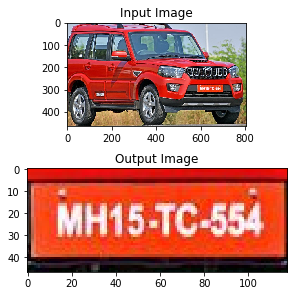

In [80]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots(2, 1, constrained_layout=True)

# Set title
ax[0].set_title('Input Image')
ax[1].set_title('Output Image')

# Display the images
ax[0].imshow(carImage)
ax[1].imshow(plateImage)

plt.show()

In [82]:
cv2.imwrite('Test_plate.jpg', np.array(plateImage))

True